# Churn_Modelling
#### Reference: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset[0:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Preprocessing

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Fitting the classifier to the Training set: Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Making the Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix
def Classification(clf, X, y):
    X_set, y_set = X, y
    y_hat = clf.predict(X_set)
    y_hat = np.reshape(y_hat, -1)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    cm = confusion_matrix(y_set, y_hat)
    accuracy = (cm[0, 0] + cm[1, 1])/cm.sum()
    TPR = cm[0, 0]/cm[:, 0].sum() # Sensitivitive, Recall
    TNR = cm[1, 1]/cm[:, 1].sum() # Specificitive
    PPV = cm[0, 0]/cm[0, :].sum() # Positive Predictive Value, Precision
    NPV = cm[1, 1]/cm[1, :].sum() # Negative Predictive Value,  
    F1_score = 2/(1/PPV + 1/TPR)
    summary = {'Accuracy': accuracy, 
               'Positive_Predictive_Value': PPV, 
               'Negative_Predictive_Value': NPV,            
               'Sensitivitive': TPR, 
               'Specificitive': TNR,            
               'F1_score': F1_score, 
               'CM': cm}
    return summary

### Training Set

In [5]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 1.0,
 'Positive_Predictive_Value': 1.0,
 'Negative_Predictive_Value': 1.0,
 'Sensitivitive': 1.0,
 'Specificitive': 1.0,
 'F1_score': 1.0,
 'CM': array([[6368,    0],
        [   0, 1632]], dtype=int64)}

### Test Set

In [6]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.802,
 'Positive_Predictive_Value': 0.8601880877742947,
 'Negative_Predictive_Value': 0.5728395061728395,
 'Sensitivitive': 0.8880258899676375,
 'Specificitive': 0.5098901098901099,
 'F1_score': 0.8738853503184714,
 'CM': array([[1372,  223],
        [ 173,  232]], dtype=int64)}

## Using k-fold Cross Validation to evaluate the model's performance

In [7]:
# Applying k-fold Cross Validation
from sklearn.model_selection import cross_val_score
def cv_score(clf, X, y, cv):
    accuracies = cross_val_score(estimator = clf, X = X, y = y, cv = cv)
    plt.plot(accuracies, '-o')
    plt.axhline(accuracies.mean(), color = 'black', ls = '-')
    plt.axhline(accuracies.mean() + 2 * accuracies.std(), color = 'black', ls = '--')
    plt.axhline(accuracies.mean() - 2 * accuracies.std(), color = 'black', ls = '--')
    plt.xlabel('CV')
    plt.ylabel('Accuracy')
    plt.show()
    return [accuracies.mean(), accuracies.std()]

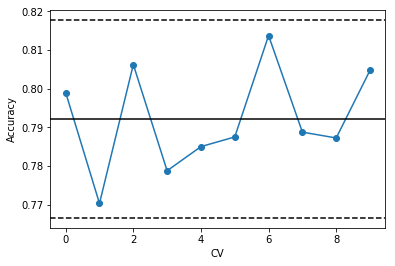

Decision Tree: CV score = 0.792 (+/- 0.026); Test set accuracy = 0.802


In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Tree_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Tree_score.append(classifier.score(X_test, y_test))
print('Decision Tree: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Tree_score[0], 2 * Tree_score[1], Tree_score[2]))

# Conclusion
此二元分類問題採用的是 Decision Tree 作為分類器，並以 k-fold Cross Validation 來評估模型的表現。以預設參數建模得到的 CV score 為 0.792，Test Set 的預測準確度為 0.802。從 Training Set 分類的正確率達到 100% 而 Test Set 分類正確率只有 80.2 % 來看，這個模型有過度擬和的問題，而且CV score 只有 0.792 也說明此模型對於預測新資料並不優秀。若使用 Random Forest 模型可改善過度擬和的問題。